In [1]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import json # library to handle JSON files
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
# import k-means from clustering stage
from sklearn.cluster import KMeans
import folium # map rendering library
from urllib.request import urlopen
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

print('Libraries imported.')

Libraries imported.


Fetch the Coordinates of San Francisco

In [2]:
address = 'San Francisco,California'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate are {}, {}.'.format(latitude, longitude))

C:\Users\abhin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Using Nominatim with the default "geopy/1.20.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  This is separate from the ipykernel package so we can avoid doing imports until


The geograpical coordinate are 37.7792808, -122.4192363.


In [3]:
CLIENT_ID = '2G0MKVHCH3TME4LE2WXMB05RNA53M3HEO020NOR5YYSZD4VU' # your Foursquare ID
CLIENT_SECRET = 'MVVTOEEO4SRQ1XBNX30DYQKQAUJDPO3DRK0LBBKHSR5JLUUF' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 2G0MKVHCH3TME4LE2WXMB05RNA53M3HEO020NOR5YYSZD4VU
CLIENT_SECRET:MVVTOEEO4SRQ1XBNX30DYQKQAUJDPO3DRK0LBBKHSR5JLUUF


In [4]:

LIMIT = 300 # limit of number of venues returned by Foursquare API
radius = 500 # define radius

# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
    radius, 
    LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=2G0MKVHCH3TME4LE2WXMB05RNA53M3HEO020NOR5YYSZD4VU&client_secret=MVVTOEEO4SRQ1XBNX30DYQKQAUJDPO3DRK0LBBKHSR5JLUUF&v=20180605&ll=37.7792808,-122.4192363&radius=500&limit=300'

In [5]:
results = requests.get(url).json()

{'meta': {'code': 200, 'requestId': '5cf9550d1ed21914c1a8037d'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': '$-$$$$', 'key': 'price'},
    {'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Civic Center',
  'headerFullLocation': 'Civic Center, San Francisco',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 128,
  'suggestedBounds': {'ne': {'lat': 37.783780804500005,
    'lng': -122.41355343630961},
   'sw': {'lat': 37.7747807955, 'lng': -122.42491916369038}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4aa48566f964a520024720e3',
       'name': 'Louise M. Davies Symphony Hall',
       'location': {'address': '201 Van Ness Ave',
        'crossStreet': 'btwn Grove & Hayes St',
        'lat': 37.77797

In [6]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [7]:

venues = results['response']['groups'][0]['items']
nearby_venues = json_normalize(venues)
filtered_columns = ['venue.name', 'venue.id', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

nearby_venues

,venue.name,venue.id,venue.categories,venue.location.lat,venue.location.lng
0,Louise M. Davies Symphony Hall,4aa48566f964a520024720e3,Concert Hall,37.777976,-122.420157
1,Herbst Theater,5622d1d7498eec470c196e3a,Concert Hall,37.779548,-122.420953
2,Señor Sisig,562405f6498e32f69e70a7a3,Food Truck,37.779570,-122.417047
3,War Memorial Opera House,49c7dcc3f964a520c9571fe3,Opera House,37.778601,-122.420816
4,San Francisco Ballet,4b2e994af964a5205ee324e3,Dance Studio,37.778580,-122.420798
5,The Nutcracker,5a337879c0f163516b7a9282,Performing Arts Venue,37.778569,-122.420800
6,War Memorial Court,4b9bec09f964a520213636e3,Park,37.779042,-122.420971
7,Asian Art Museum,43601880f964a5202e291fe3,Art Museum,37.780178,-122.416505
8,Off the Grid: Civic Center,4c8a72e23dc2a1cda907ad32,Street Food Gathering,37.779303,-122.418160
9,Siam Orchid Traditional Thai Massage,55346c03498e56b57395abc1,Massage Studio,37.777111,-122.417967


In [8]:
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues

,name,id,categories,lat,lng
0,Louise M. Davies Symphony Hall,4aa48566f964a520024720e3,Concert Hall,37.777976,-122.420157
1,Herbst Theater,5622d1d7498eec470c196e3a,Concert Hall,37.779548,-122.420953
2,Señor Sisig,562405f6498e32f69e70a7a3,Food Truck,37.779570,-122.417047
3,War Memorial Opera House,49c7dcc3f964a520c9571fe3,Opera House,37.778601,-122.420816
4,San Francisco Ballet,4b2e994af964a5205ee324e3,Dance Studio,37.778580,-122.420798
5,The Nutcracker,5a337879c0f163516b7a9282,Performing Arts Venue,37.778569,-122.420800
6,War Memorial Court,4b9bec09f964a520213636e3,Park,37.779042,-122.420971
7,Asian Art Museum,43601880f964a5202e291fe3,Art Museum,37.780178,-122.416505
8,Off the Grid: Civic Center,4c8a72e23dc2a1cda907ad32,Street Food Gathering,37.779303,-122.418160
9,Siam Orchid Traditional Thai Massage,55346c03498e56b57395abc1,Massage Studio,37.777111,-122.417967


In [9]:
nearby_venues['categories'].unique()

array(['Concert Hall', 'Food Truck', 'Opera House', 'Dance Studio',
       'Performing Arts Venue', 'Park', 'Art Museum',
       'Street Food Gathering', 'Massage Studio', 'Coffee Shop',
       'Beer Bar', 'Scandinavian Restaurant', 'Cocktail Bar',
       'Indian Restaurant', 'Café', 'Bookstore',
       'Vegetarian / Vegan Restaurant', 'Ramen Restaurant', 'Bakery',
       'Furniture / Home Store', 'Jazz Club', 'Optical Shop',
       'Music Venue', 'Sushi Restaurant', 'Clothing Store', 'Theater',
       'Mexican Restaurant', 'Vietnamese Restaurant', 'Tiki Bar',
       "Men's Store", 'Wine Shop', 'Gym / Fitness Center',
       'Food & Drink Shop', 'Thai Restaurant', 'French Restaurant',
       'Poke Place', 'Southern / Soul Food Restaurant', 'Rock Club',
       'Lounge', 'Wine Bar', 'Juice Bar', 'Candy Store',
       'Asian Restaurant', 'Burger Joint', 'Sandwich Place',
       'Music School', 'Malay Restaurant', 'Roof Deck',
       'Indie Movie Theater', 'American Restaurant', 'Boutique'

In [10]:
nearby_venues.shape

(100, 5)

In [12]:
venue_id_list = nearby_venues['id'].tolist()
venue_id_list

['4aa48566f964a520024720e3',
 '5622d1d7498eec470c196e3a',
 '562405f6498e32f69e70a7a3',
 '49c7dcc3f964a520c9571fe3',
 '4b2e994af964a5205ee324e3',
 '5a337879c0f163516b7a9282',
 '4b9bec09f964a520213636e3',
 '43601880f964a5202e291fe3',
 '4c8a72e23dc2a1cda907ad32',
 '55346c03498e56b57395abc1',
 '515a3fa1e4b0d8e060562071',
 '5151a10ce4b06ae7735335db',
 '519fcb37498e91a13cb23d6b',
 '57108481498eabd0f3723914',
 '4fe942b1e4b0f69d225327ad',
 '55df9e27498ef4c72ac83a77',
 '5823e2297c74e13e29ba6ec2',
 '5bbcefe5a6031c002c147a3a',
 '4bc77b370050b71392c7b83b',
 '4a0cb0fff964a52056751fe3',
 '4d8eabc7d265236af9a71017',
 '4c61efdb79d1e21e5912d515',
 '4cae4729562d224b8fe90488',
 '52509016498efba365a2f4de',
 '50f21340e4b036c5cc0d7c7d',
 '5473635d498e14e5b792756d',
 '48569af7f964a520ba501fe3',
 '58901f9ce18e653095361b48',
 '5955a2f275cb8c11484ffc5f',
 '4b7169c0f964a52069452de3',
 '5560dbdb498e91a2bcde84f6',
 '46d36f99f964a520594a1fe3',
 '5600850a498edff486fdfe89',
 '56170930498ec64a072b43b9',
 '5005c520e4b0

In [13]:
url_list = []
like_list = []
json_list = []

for i in venue_id_list:
    venue_url = 'https://api.foursquare.com/v2/venues/{}/likes?client_id={}&client_secret={}&v={}'.format(i, CLIENT_ID, CLIENT_SECRET, VERSION)
    url_list.append(venue_url)
for link in url_list:
    result = requests.get(link).json()
    likes = result['response']['likes']['count']
    like_list.append(likes)
print(like_list)
print(len(like_list))
print(len(venue_id_list))

[786, 113, 35, 521, 162, 8, 27, 1487, 32, 34, 202, 475, 286, 6, 198, 587, 144, 32, 42, 144, 331, 76, 36, 34, 401, 188, 657, 98, 138, 40, 453, 675, 294, 215, 167, 1102, 104, 88, 56, 157, 521, 363, 368, 71, 1170, 54, 413, 7, 286, 35, 27, 31, 667, 58, 113, 29, 23, 20, 458, 64, 121, 218, 428, 54, 932, 89, 18, 112, 12, 96, 79, 12, 63, 56, 70, 81, 132, 65, 314, 163, 37, 100, 462, 7, 72, 241, 12, 480, 180, 60, 8, 47, 21, 30, 77, 14, 295, 237, 16, 22]
100
100


In [14]:
ny_venues = nearby_venues.copy()
ny_venues.head()

,name,id,categories,lat,lng
0,Louise M. Davies Symphony Hall,4aa48566f964a520024720e3,Concert Hall,37.777976,-122.420157
1,Herbst Theater,5622d1d7498eec470c196e3a,Concert Hall,37.779548,-122.420953
2,Señor Sisig,562405f6498e32f69e70a7a3,Food Truck,37.779570,-122.417047
3,War Memorial Opera House,49c7dcc3f964a520c9571fe3,Opera House,37.778601,-122.420816
4,San Francisco Ballet,4b2e994af964a5205ee324e3,Dance Studio,37.778580,-122.420798


In [15]:
ny_venues['total likes'] = like_list
ny_venues.head()

,name,id,categories,lat,lng,total likes
0,Louise M. Davies Symphony Hall,4aa48566f964a520024720e3,Concert Hall,37.777976,-122.420157,786
1,Herbst Theater,5622d1d7498eec470c196e3a,Concert Hall,37.779548,-122.420953,113
2,Señor Sisig,562405f6498e32f69e70a7a3,Food Truck,37.779570,-122.417047,35
3,War Memorial Opera House,49c7dcc3f964a520c9571fe3,Opera House,37.778601,-122.420816,521
4,San Francisco Ballet,4b2e994af964a5205ee324e3,Dance Studio,37.778580,-122.420798,162


1487
6
97.0
209.42


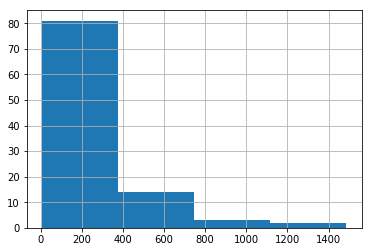

In [16]:
print(ny_venues['total likes'].max())
print(ny_venues['total likes'].min())
print(ny_venues['total likes'].median())
print(ny_venues['total likes'].mean())

ny_venues['total likes'].hist(bins=4)
plt.show()

In [17]:
print(np.percentile(ny_venues['total likes'], 25))
print(np.percentile(ny_venues['total likes'], 50))
print(np.percentile(ny_venues['total likes'], 75))

poor = ny_venues['total likes']<=24
below_avg = ny_venues[(ny_venues['total likes']>24) & (ny_venues['total likes']<=45)]
abv_avg = ny_venues[(ny_venues['total likes']>45) & (ny_venues['total likes']<=76)]
great = ny_venues['total likes']>76

35.0
97.0
288.0


In [18]:
def conditions(s):
    if s['total likes']<=20:
        return 'poor'
    if s['total likes']<=59:
        return 'below avg'
    if s['total likes']<=80:
        return 'avg avg'
    if s['total likes']>80:
        return 'great'

ny_venues['total likes_cat']=ny_venues.apply(conditions, axis=1)

In [19]:
ny_venues

,name,id,categories,lat,lng,total likes,total likes_cat
0,Louise M. Davies Symphony Hall,4aa48566f964a520024720e3,Concert Hall,37.777976,-122.420157,786,great
1,Herbst Theater,5622d1d7498eec470c196e3a,Concert Hall,37.779548,-122.420953,113,great
2,Señor Sisig,562405f6498e32f69e70a7a3,Food Truck,37.779570,-122.417047,35,below avg
3,War Memorial Opera House,49c7dcc3f964a520c9571fe3,Opera House,37.778601,-122.420816,521,great
4,San Francisco Ballet,4b2e994af964a5205ee324e3,Dance Studio,37.778580,-122.420798,162,great
5,The Nutcracker,5a337879c0f163516b7a9282,Performing Arts Venue,37.778569,-122.420800,8,poor
6,War Memorial Court,4b9bec09f964a520213636e3,Park,37.779042,-122.420971,27,below avg
7,Asian Art Museum,43601880f964a5202e291fe3,Art Museum,37.780178,-122.416505,1487,great
8,Off the Grid: Civic Center,4c8a72e23dc2a1cda907ad32,Street Food Gathering,37.779303,-122.418160,32,below avg
9,Siam Orchid Traditional Thai Massage,55346c03498e56b57395abc1,Massage Studio,37.777111,-122.417967,34,below avg


In [20]:
ny_venues.shape

(100, 7)

In [22]:
bars = ['Pub', 'Cocktail Bar', 'Bar', 'Dive Bar', 'Sports Bar']
other = ['Bagel Shop', 'Tea Room', 'Donut Shop', 'Coffee Shop', 'Bubble Tea Shop', 'Sandwich Place', 'Boutique', 'Ice Cream Shop']
euro_asia_indian_food = ['Falafel Restaurant', 'Korean Restaurant','Sushi Restaurant', 'Indian Restaurant', 'Japanese Restaurant', 'Poke Place', 'Thai Restaurant', 'Vietnamese Restaurant']
mex_southam_food = ['Cuban Restaurant', 'Mexican Restaurant', 'South American Restaurant', 'Latin American Restaurant']
american_food = ['Burger Joint', 'Restaurant', 'American Restaurant']
italian_food = ['Italian Restaurant', 'Seafood Restaurant', 'Pizza Place']

def conditions2(s):
    if s['categories'] in euro_asia_indian_food:
        return 'euro asia indian food'
    if s['categories'] in mex_southam_food:
        return 'mex southam food'
    if s['categories'] in american_food:
        return 'american food'
    if s['categories'] in italian_food:
        return 'italian food'
    if s['categories'] in bars:
        return 'bars'
    if s['categories'] in other:
        return 'other'


ny_venues['categories_new']=ny_venues.apply(conditions2, axis=1)

In [23]:
ny_venues

,name,id,categories,lat,lng,total likes,total likes_cat,categories_new
0,Louise M. Davies Symphony Hall,4aa48566f964a520024720e3,Concert Hall,37.777976,-122.420157,786,great,None
1,Herbst Theater,5622d1d7498eec470c196e3a,Concert Hall,37.779548,-122.420953,113,great,None
2,Señor Sisig,562405f6498e32f69e70a7a3,Food Truck,37.779570,-122.417047,35,below avg,None
3,War Memorial Opera House,49c7dcc3f964a520c9571fe3,Opera House,37.778601,-122.420816,521,great,None
4,San Francisco Ballet,4b2e994af964a5205ee324e3,Dance Studio,37.778580,-122.420798,162,great,None
5,The Nutcracker,5a337879c0f163516b7a9282,Performing Arts Venue,37.778569,-122.420800,8,poor,None
6,War Memorial Court,4b9bec09f964a520213636e3,Park,37.779042,-122.420971,27,below avg,None
7,Asian Art Museum,43601880f964a5202e291fe3,Art Museum,37.780178,-122.416505,1487,great,None
8,Off the Grid: Civic Center,4c8a72e23dc2a1cda907ad32,Street Food Gathering,37.779303,-122.418160,32,below avg,None
9,Siam Orchid Traditional Thai Massage,55346c03498e56b57395abc1,Massage Studio,37.777111,-122.417967,34,below avg,None


In [24]:

ny_onehot = pd.get_dummies(ny_venues[['categories_new', 'total likes_cat']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
ny_onehot['Name'] = ny_venues['name'] 

# move neighborhood column to the first column
fixed_columns = [ny_onehot.columns[-1]] + list(ny_onehot.columns[:-1])
ny_onehot = ny_onehot[fixed_columns]

ny_onehot.head()

,Name,american food,bars,euro asia indian food,italian food,mex southam food,other,avg avg,below avg,great,poor
0,Louise M. Davies Symphony Hall,0,0,0,0,0,0,0,0,1,0
1,Herbst Theater,0,0,0,0,0,0,0,0,1,0
2,Señor Sisig,0,0,0,0,0,0,0,1,0,0
3,War Memorial Opera House,0,0,0,0,0,0,0,0,1,0
4,San Francisco Ballet,0,0,0,0,0,0,0,0,1,0


In [25]:
cluster_df = ny_onehot.drop('Name', axis=1)

k_clusters = 5

# run k-means clustering
kmeans = KMeans(n_clusters=k_clusters, random_state=0).fit(cluster_df)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([2, 2, 1, 2, 2, 3, 1, 2, 1, 1])

In [26]:
ny_venues['label'] = kmeans.labels_
ny_venues.head()

,name,id,categories,lat,lng,total likes,total likes_cat,categories_new,label
0,Louise M. Davies Symphony Hall,4aa48566f964a520024720e3,Concert Hall,37.777976,-122.420157,786,great,None,2
1,Herbst Theater,5622d1d7498eec470c196e3a,Concert Hall,37.779548,-122.420953,113,great,None,2
2,Señor Sisig,562405f6498e32f69e70a7a3,Food Truck,37.779570,-122.417047,35,below avg,None,1
3,War Memorial Opera House,49c7dcc3f964a520c9571fe3,Opera House,37.778601,-122.420816,521,great,None,2
4,San Francisco Ballet,4b2e994af964a5205ee324e3,Dance Studio,37.778580,-122.420798,162,great,None,2


In [27]:

map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(k_clusters)
ys = [i+x+(i*x)**2 for i in range(k_clusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(ny_venues['lat'], ny_venues['lng'], ny_venues['name'], ny_venues['label']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [28]:
ny_venues.loc[ny_venues['label']==0]

,name,id,categories,lat,lng,total likes,total likes_cat,categories_new,label
11,Philz Coffee,5151a10ce4b06ae7735335db,Coffee Shop,37.781433,-122.417073,475,great,other,0
30,Blue Bottle Coffee,5560dbdb498e91a2bcde84f6,Coffee Shop,37.776286,-122.416867,453,great,other,0
62,Saigon Sandwich,43eb7d31f964a520392f1fe3,Sandwich Place,37.783084,-122.417650,428,great,other,0
64,Blue Bottle Coffee,43d3901ef964a5201f2e1fe3,Coffee Shop,37.776430,-122.423224,932,great,other,0
81,Azalea Boutique,4a7f6580f964a520e4f31fe3,Boutique,37.776805,-122.423107,100,great,other,0


In [29]:
ny_venues.loc[ny_venues['label']==1]


,name,id,categories,lat,lng,total likes,total likes_cat,categories_new,label
2,Señor Sisig,562405f6498e32f69e70a7a3,Food Truck,37.779570,-122.417047,35,below avg,None,1
6,War Memorial Court,4b9bec09f964a520213636e3,Park,37.779042,-122.420971,27,below avg,None,1
8,Off the Grid: Civic Center,4c8a72e23dc2a1cda907ad32,Street Food Gathering,37.779303,-122.418160,32,below avg,None,1
9,Siam Orchid Traditional Thai Massage,55346c03498e56b57395abc1,Massage Studio,37.777111,-122.417967,34,below avg,None,1
17,Bi-Rite Cafe,5bbcefe5a6031c002c147a3a,Café,37.778779,-122.417164,32,below avg,None,1
18,"Books, Inc.",4bc77b370050b71392c7b83b,Bookstore,37.781614,-122.420531,42,below avg,None,1
22,Andersen Bread,4cae4729562d224b8fe90488,Bakery,37.776906,-122.417400,36,below avg,None,1
23,Maker & Moss,52509016498efba365a2f4de,Furniture / Home Store,37.777144,-122.422368,34,below avg,None,1
29,Acrimony,4b7169c0f964a52069452de3,Clothing Store,37.777025,-122.421992,40,below avg,None,1
38,Arlequin Wine Merchant,4aa9afacf964a520e05420e3,Wine Shop,37.777061,-122.422605,56,below avg,None,1


In [30]:

ny_venues.loc[ny_venues['label']==2]

,name,id,categories,lat,lng,total likes,total likes_cat,categories_new,label
0,Louise M. Davies Symphony Hall,4aa48566f964a520024720e3,Concert Hall,37.777976,-122.420157,786,great,None,2
1,Herbst Theater,5622d1d7498eec470c196e3a,Concert Hall,37.779548,-122.420953,113,great,None,2
3,War Memorial Opera House,49c7dcc3f964a520c9571fe3,Opera House,37.778601,-122.420816,521,great,None,2
4,San Francisco Ballet,4b2e994af964a5205ee324e3,Dance Studio,37.778580,-122.420798,162,great,None,2
7,Asian Art Museum,43601880f964a5202e291fe3,Art Museum,37.780178,-122.416505,1487,great,None,2
10,Sydney Goldstein Theater,515a3fa1e4b0d8e060562071,Performing Arts Venue,37.777031,-122.420979,202,great,None,2
12,The Beer Hall,519fcb37498e91a13cb23d6b,Beer Bar,37.776837,-122.417916,286,great,None,2
14,PLÄJ,4fe942b1e4b0f69d225327ad,Scandinavian Restaurant,37.778733,-122.422106,198,great,None,2
15,Whitechapel,55df9e27498ef4c72ac83a77,Cocktail Bar,37.782230,-122.418884,587,great,bars,2
16,August 1 Five,5823e2297c74e13e29ba6ec2,Indian Restaurant,37.780537,-122.420188,144,great,euro asia indian food,2


In [31]:
ny_venues.loc[ny_venues['label']==3]

,name,id,categories,lat,lng,total likes,total likes_cat,categories_new,label
5,The Nutcracker,5a337879c0f163516b7a9282,Performing Arts Venue,37.778569,-122.420800,8,poor,None,3
13,Taube Atrium Theater,57108481498eabd0f3723914,Performing Arts Venue,37.779551,-122.420869,6,poor,None,3
47,The Green Room,4ba42f96f964a5201b8a38e3,Lounge,37.779714,-122.420216,7,poor,None,3
57,Soundbox,548b37a3498ee6785a1468df,Music Venue,37.777344,-122.421223,20,poor,None,3
66,Twitter Roofdeck,4fd6881ee4b071684f9b4c29,Roof Deck,37.776541,-122.416942,18,poor,None,3
68,Garrett Leight California Optical,560dfa17498edb1c6b94598d,Optical Shop,37.776864,-122.422797,12,poor,None,3
71,Nancy Boy,4b525e28f964a520b97927e3,Furniture / Home Store,37.776980,-122.422131,12,poor,None,3
83,Simply Cafe,5a7759568b98fd634e285ee4,Café,37.777969,-122.422344,7,poor,None,3
86,minimal,4ae9e625f964a5206cb721e3,Furniture / Home Store,37.777030,-122.422307,12,poor,None,3
90,Boys & Girls Clubs of San Francisco - Don Fish...,54cffd6f498e14bbb09e9fb4,Recreation Center,37.778927,-122.422658,8,poor,None,3


In [32]:
ny_venues.loc[ny_venues['label']==4]

,name,id,categories,lat,lng,total likes,total likes_cat,categories_new,label
21,Mela Tandoori Kitchen,4c61efdb79d1e21e5912d515,Indian Restaurant,37.781178,-122.419504,76,avg avg,euro asia indian food,4
43,Poké Bar,5755cbd5498e79290f67dd57,Poke Place,37.776507,-122.417254,71,avg avg,euro asia indian food,4
59,Hayes Valley Bakeworks,4fede2248302c7a9cbdd6fd4,Bakery,37.778666,-122.423347,64,avg avg,None,4
70,George and Lennie,55da2db5498eb79ab95580cb,Coffee Shop,37.781701,-122.415213,79,avg avg,other,4
72,Hinata,584a0d7b349355671db7eab2,Sushi Restaurant,37.783090,-122.420732,63,avg avg,euro asia indian food,4
74,Rand + Statler,4dbc648593a08f9274bd305b,Boutique,37.776743,-122.423299,70,avg avg,other,4
77,Christopher Elbow Chocolates,49c053c5f964a5205f551fe3,Chocolate Shop,37.776831,-122.423048,65,avg avg,None,4
84,Max's Opera Cafe,43e9f2f1f964a520252f1fe3,Diner,37.781120,-122.420681,72,avg avg,None,4
89,Nightbird,57b3c4c6cd10588ecc2e71e2,Restaurant,37.776541,-122.422904,60,avg avg,american food,4
94,Phoenix Hotel,49f903caf964a5204e6d1fe3,Hotel,37.782926,-122.418090,77,avg avg,None,4
